In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [61]:
#Importing dataset

df = pd.read_csv('final_college_data.csv')

In [62]:
df.columns

Index(['Player', 'GP', 'FT%', 'ORtg', '3P%_NCAA', 'PORPAG', 'Adj_O_Eff',
       'Mid%', 'O_BPM', 'PTS_PG', '3PT/100', 'TS%', 'USG', 'Recruiting_Rank',
       'Class', 'Year', 'Height (inches)', 'NBA Adjusted 3P%'],
      dtype='object')

In [63]:
#For feature selection. Checking correlation with target and multicollinearity

numerical_columns = df.drop(columns=["Player"])

In [64]:
# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Get correlations for the "Salary" column
target_correlation = correlation_matrix["NBA Adjusted 3P%"]

# Sort correlations in decreasing order
sorted_correlations = target_correlation.sort_values(ascending=False)

# Print sorted correlations
print(sorted_correlations)

NBA Adjusted 3P%    1.000000
3PT/100             0.685864
FT%                 0.560292
3P%_NCAA            0.384465
O_BPM               0.292084
PORPAG              0.164723
ORtg                0.154447
PTS_PG              0.145706
Year                0.143835
Adj_O_Eff           0.126763
GP                  0.101901
Class               0.072985
Mid%                0.058699
TS%                 0.020717
USG                -0.024253
Recruiting_Rank    -0.120075
Height (inches)    -0.357303
Name: NBA Adjusted 3P%, dtype: float64


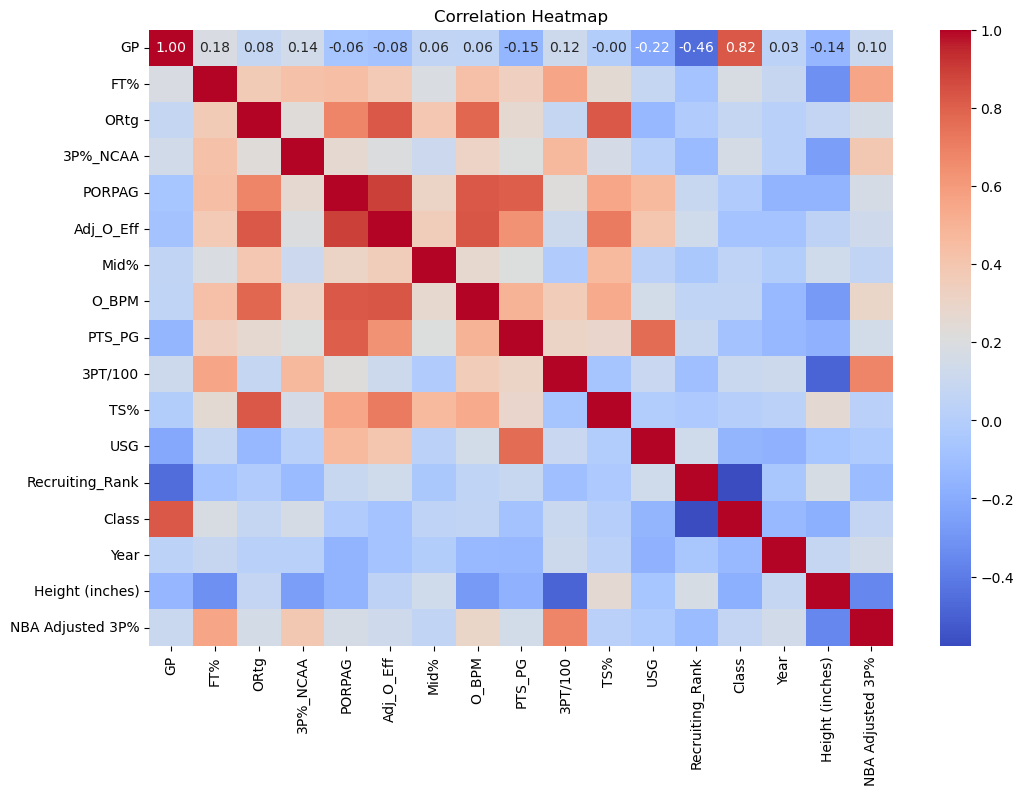

In [65]:
correlation_matrix = numerical_columns.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [66]:
#Choosing Targets

targets = df.drop(columns=['Player', 'Year', 'Class', 'USG', 'TS%', 'Adj_O_Eff', 'ORtg', 'NBA Adjusted 3P%'])
targets

X = targets
y = df['NBA Adjusted 3P%']  # Target variable (dependent variable)


## Linear Regression

In [69]:
X = sm.add_constant(X)

In [70]:
model = sm.OLS(y, X).fit()

In [71]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       NBA Adjusted 3P%   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     63.78
Date:                Mon, 05 Feb 2024   Prob (F-statistic):           2.91e-85
Time:                        02:19:21   Log-Likelihood:                 686.24
No. Observations:                 559   AIC:                            -1350.
Df Residuals:                     548   BIC:                            -1303.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0702      0.098     

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [75]:
lr_model = LinearRegression()
scaler = StandardScaler()

In [78]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [79]:
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [92]:
r2_scorer = make_scorer(r2_score)

scores_mse = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
scores_r2 = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring=r2_scorer)

rmse_scores = np.sqrt(-scores)

print('Cross_val MSE', scores_mse)
print('Cross val R-squared', scores_r2)
print('Cross val rmse', rmse_scores)

Cross_val MSE [-0.00530377 -0.00484223 -0.00571564 -0.00515606 -0.00584425]
Cross val R-squared [0.53472123 0.57236971 0.47773629 0.51563385 0.50883713]
Cross val rmse [0.07282699 0.06958615 0.07560187 0.0718057  0.07644769]


In [94]:
# Predict on the training set
predicted_values = lr_model.predict(X_train_scaled)

#  r-squared, MSE, rmse for the predicted values
r2 = r2_score(y_train, predicted_values)
mse = mean_squared_error(y_train, predicted_values)
rmse = mean_squared_error(y_train, predicted_values, squared=False)

# Print scores
print(f'RMSE on Training Set: {rmse}')
print(f'R-squared on Training Set: {r2}')
print(f'MSE on Training Set: {mse}')


RMSE on Training Set: 0.07174625669114462
R-squared on Training Set: 0.5445722165393823
MSE on Training Set: 0.005147525349191614


## Random Forest

In [95]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  

In [96]:
rf_regressor.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [98]:

cv_scores = cross_val_score(rf_regressor, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')  # Adjust the number of folds (cv=5) as needed
r2_scorer = make_scorer(r2_score)

scores_mse = cross_val_score(rf_regressor, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
scores_r2 = cross_val_score(rf_regressor, X_train_scaled, y_train, cv=5, scoring=r2_scorer)

rmse_scores = np.sqrt(-scores)

print('Cross_val MSE', scores_mse)
print('Cross val R-squared', scores_r2)
print('Cross val rmse', rmse_scores)

Cross_val MSE [-0.00668761 -0.00533982 -0.00573894 -0.00643913 -0.006019  ]
Cross val R-squared [0.41332209 0.52842653 0.47560787 0.39510081 0.49415026]
Cross val rmse [0.07282699 0.06958615 0.07560187 0.0718057  0.07644769]


In [48]:
cv_scores

array([-0.00448321, -0.00534205, -0.00592819, -0.00742451, -0.0060208 ])

In [105]:
y_train_pred = rf_regressor.predict(X_train_scaled)
# Calculate the RMSE on the training data
train_mse = mean_squared_error(y_train, y_train_pred)
print("MSE on training data:", train_mse)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("RMSE on training data:", train_rmse)
r2_train = r2_score(y_train, y_train_pred)
print(f'R-squared on Training Data: {r2_train}')

MSE on training data: 0.0008989862295342169
RMSE on training data: 0.029983099064876815
R-squared on Training Data: 0.9204621098286221


In [107]:
# Dummy Model RF
dummy_model = DummyRegressor(strategy="mean")
dummy_model.fit(X_train_scaled, y_train)  # Fit the dummy model separately

y_pred_dummy = dummy_model.predict(X_test)


mse_dummy = mean_squared_error(y_test, y_pred_dummy)
rmse_dummy = np.sqrt(mean_squared_error(y_test, y_pred_dummy))
r2_train = r2_score(y_test, y_pred_dummy)
print(f'R-squared on Training Data: {r2_train}')

print("Dummy Model MSE:", mse_dummy)
print("Dummy Model RMSE:", rmse_dummy)

R-squared on Training Data: -0.010027903161375695
Dummy Model MSE: 0.008474127370394248
Dummy Model RMSE: 0.09205502360216007
